In [ ]:
"""
This is inspired from lecture Monte Carlo Simulation by MIT Professor John Guttag in 
course 6.0002 (Introduction to Computational thinking and Data Science).
Let's get started ! 

@Author : Aman Singh Thakur
@Date : 21st June, 2020
@Description : Detailed Monte Carlo Simulation
@Quote :The universe is held up by the same combination of numbers which we can count on our fingers. Isn't it fascinating ?

"""

In [1]:
import enum

class POCKET_COLOR(enum.Enum):
    RED=1
    BLACK=2
    GREEN=3 
    
class POCKET:
    def __init__(self, pocket_no, pocket_color):
        self.pocket_no = pocket_no
        self.pocket_color = pocket_color
    def __str__(self):
        pocket_no = str(self.pocket_no)
        pocket_color = POCKET_COLOR(self.pocket_color).name
        return "POCKET "+pocket_no+" "+pocket_color

class RouletteTable:
  def __init__(self, name, number_range):
    self.name = name
    self.pockets = []
    flag=0
    for i in range (1, number_range+1):
        if flag==0 :
            self.pockets.append(POCKET(i,POCKET_COLOR.RED))
            flag=1
        else:
            self.pockets.append(POCKET(i,POCKET_COLOR.BLACK))
            flag=0

class BettingScheme:
    def __init__(self, total_asset, initial_bet, if_loss_is_double_or_nothing, is_allow_negative_cash):
        self.total_asset=total_asset
        self.initial_bet=initial_bet
        self.if_loss_is_double_or_nothing=if_loss_is_double_or_nothing
        self.is_allow_negative_cash=is_allow_negative_cash
        self.asset_graph=[]
        
            
class RouletteBasicStrategy:
     def __init__(self):
        self.strategyNames = ['All Red/Odd', 'All Black/Even', 'First12', 'Second12', 
                     'Third12', 'First18', 'Second18', 'RandomRow', 'RandomCol', 'RandomNo']
        self.strategyList = {
            'All Red/Odd' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35],
            'All Black/Even' : [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34, 36],
            'First12' : [1,2,3,4,5,6,7,8,9,10,11,12],
            'Second12' : [13,14,15,16,17,18,19,20,21,22,23,24],
            'Third12' : [25,26,27,28,29,30,31,32,33,34,36],
            'First18' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
            'Second18' : [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36],
            'RandomRow' : [1,4,7,10,13,16,19,22,25,28,31,34],
            'RandomCol' : [1,2,3],
            'RandomNo' : [1]
        }
        self.strategyIncentive = [1, 1, 2, 2, 2, 1, 1, 2, 11, 35]

In [3]:
import random
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

def letsPlayRoulette(rouletteTable, strategy_list, bettingScheme, total_epoch, epoch_logger_break, roulette_start, roulette_end):
    
    pockets_frequency = [0 for x in range(roulette_start,roulette_end+1)]
    
    bettingArray = []
    for i in range(0, len(strategy_list.strategyNames)):
        bettingArray.append(BettingScheme(bettingScheme.total_asset,bettingScheme.initial_bet, 
                                          bettingScheme.if_loss_is_double_or_nothing, bettingScheme.is_allow_negative_cash))

    for epoch in range(0, total_epoch):
        
        pocket_on_spinning_the_wheel = random.randint(roulette_start,roulette_end)
        pockets_frequency[pocket_on_spinning_the_wheel-1]+=1
        
        for strategy in range(0, len(strategy_list.strategyNames)):
            name = strategy_list.strategyNames[strategy]
            if(bettingArray[strategy].is_allow_negative_cash==False and bettingArray[strategy].total_asset<0):
                break
            if pocket_on_spinning_the_wheel in strategy_list.strategyList[name]:
                bettingArray[strategy].total_asset+=bettingArray[strategy].initial_bet*strategy_list.strategyIncentive[strategy]
            else:
                bettingArray[strategy].total_asset-=bettingArray[strategy].initial_bet
                if(bettingArray[strategy].if_loss_is_double_or_nothing==True):
                    bettingArray[strategy].initial_bet*=2
            bettingArray[strategy].asset_graph.append(bettingArray[strategy].total_asset)        
            
        if epoch%epoch_logger_break==0 :
            print("Epoch No "+str(epoch)+" is done")
    
    return bettingArray, pockets_frequency

def showAssetsByEpochGraph(bettingArray, epochs, strategy, base_amount, GRAPH_LIMIT_FACTOR, RouletteTable):
    plt.style.use('ggplot')
    epoch_range_x_axis = [x for x in range(0,epochs)]
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.tick_params(labelsize=14)
    #fig.savefig('test2png.png', dpi=100)
    
    for i in range(0, len(bettingArray)):
        ax.plot(epoch_range_x_axis, bettingArray[i].asset_graph, 1,label=strategy.strategyNames[i] ,linewidth=2)
    
    plt.title(RouletteTable.name+' Strategy-Time Graph')
    plt.xlabel('Epoch No')
    plt.ylabel('Different Strategy')
    legend_without_duplicate_labels(ax)
    plt.ylim((-GRAPH_LIMIT_FACTOR*base_amount,GRAPH_LIMIT_FACTOR*base_amount))
    plt.show()

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', bbox_to_anchor=(1,1))
    
def showBarGraphAssetByStrategy(bettingArray, strategy, RouletteTable):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    fig.set_size_inches(16, 8)
    plt.tick_params(labelsize=14)
    plt.title(RouletteTable.name+' Asset Bar Graph')
    plt.ylabel('Asset after Stress Test')
    names = strategy.strategyNames
    values = []
    for i in range(0, len(bettingArray)):
        values.append(bettingArray[i].asset_graph[len(bettingArray[i].asset_graph)-1])
    ax.bar(names,values)
    plt.show()

In [4]:
#CONSTANTS

EPOCH = 100000
DEFAULT_EPOCH_LOGGER = EPOCH/2
INITIAL_AMOUNT = 1000
INITIAL_BET = 25
DEFAULT_ROULETTE_POCKETS = 36
GRAPH_LIMIT_FACTOR=50

Epoch No 0 is done
Epoch No 50000 is done


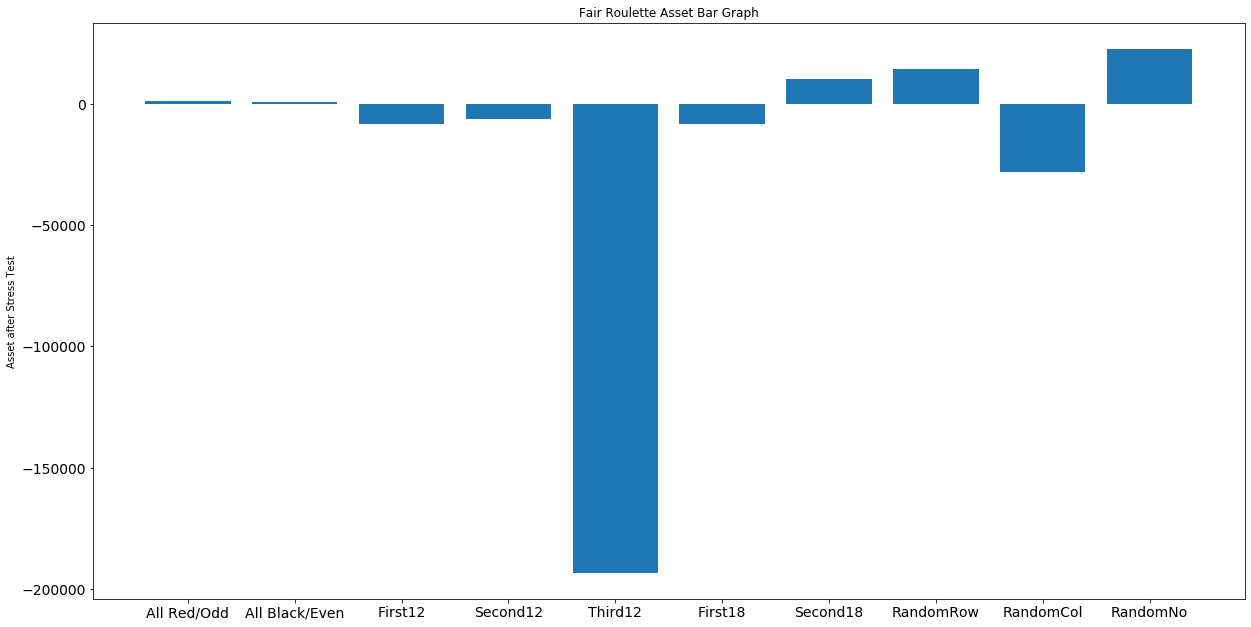

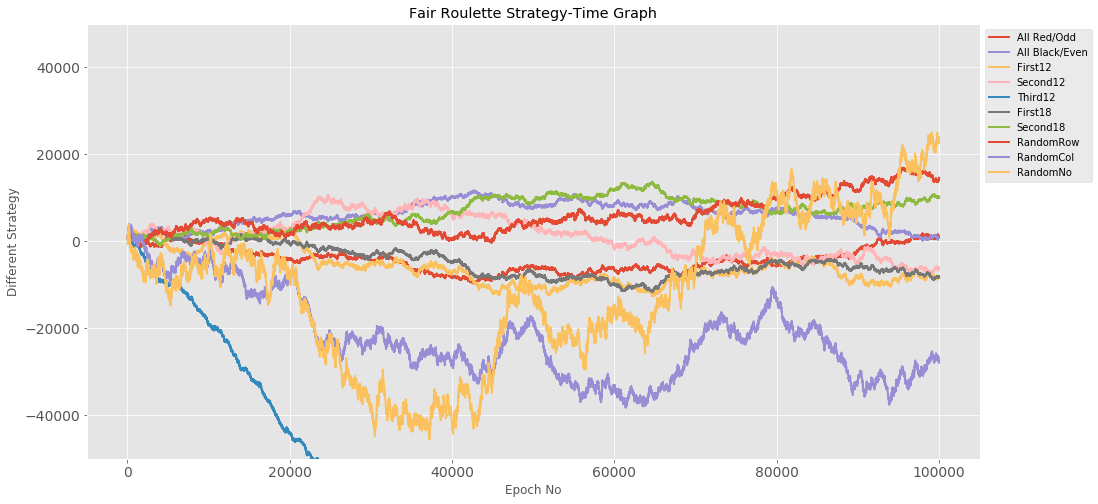

In [5]:
#Fair Roulette Table

fairRoulette = RouletteTable('Fair Roulette', DEFAULT_ROULETTE_POCKETS)
bettingScheme = BettingScheme(INITIAL_AMOUNT, INITIAL_BET, False, True)
basicStrategy = RouletteBasicStrategy()

bettingArray, pockets_frequency = letsPlayRoulette(fairRoulette, basicStrategy, bettingScheme, EPOCH, DEFAULT_EPOCH_LOGGER, 1, 36)
showBarGraphAssetByStrategy(bettingArray, basicStrategy, fairRoulette)
showAssetsByEpochGraph(bettingArray, EPOCH, basicStrategy, INITIAL_AMOUNT, GRAPH_LIMIT_FACTOR, fairRoulette)

In [6]:
EuropeanRoulette = RouletteTable('European Roulett', 36)
EuropeanRoulette.pockets.append(POCKET(0,POCKET_COLOR.GREEN))
bettingScheme = BettingScheme(INITIAL_AMOUNT, INITIAL_BET, False, True)
basicStrategy = RouletteBasicStrategy()

Epoch No 0 is done
Epoch No 50000 is done


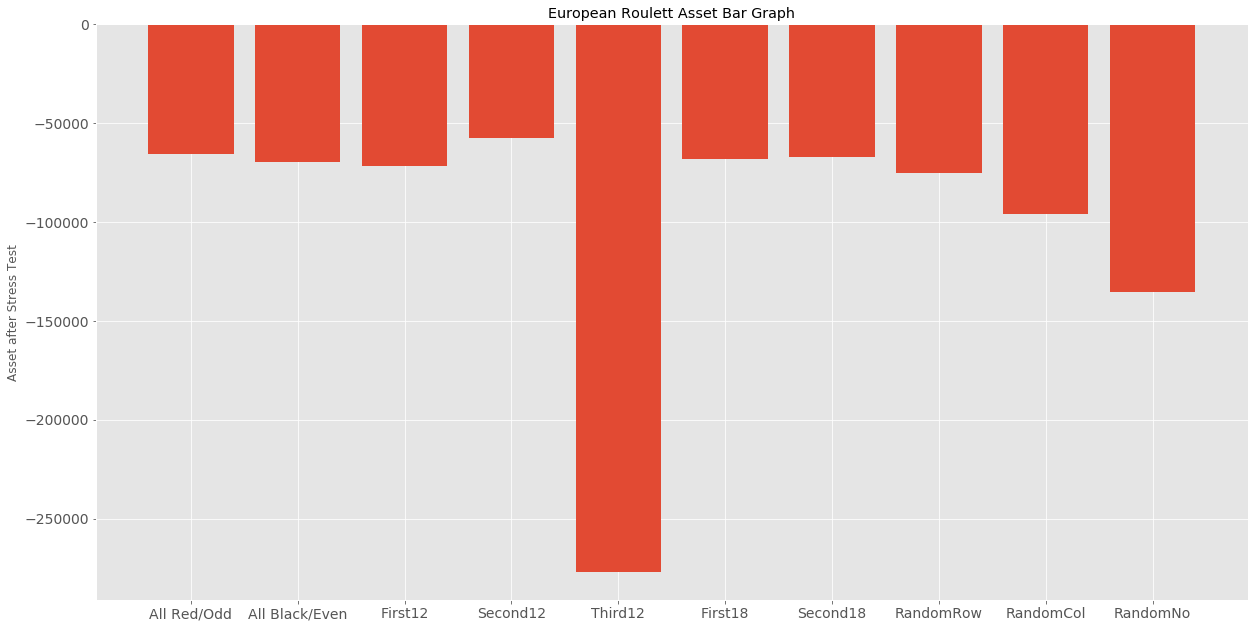

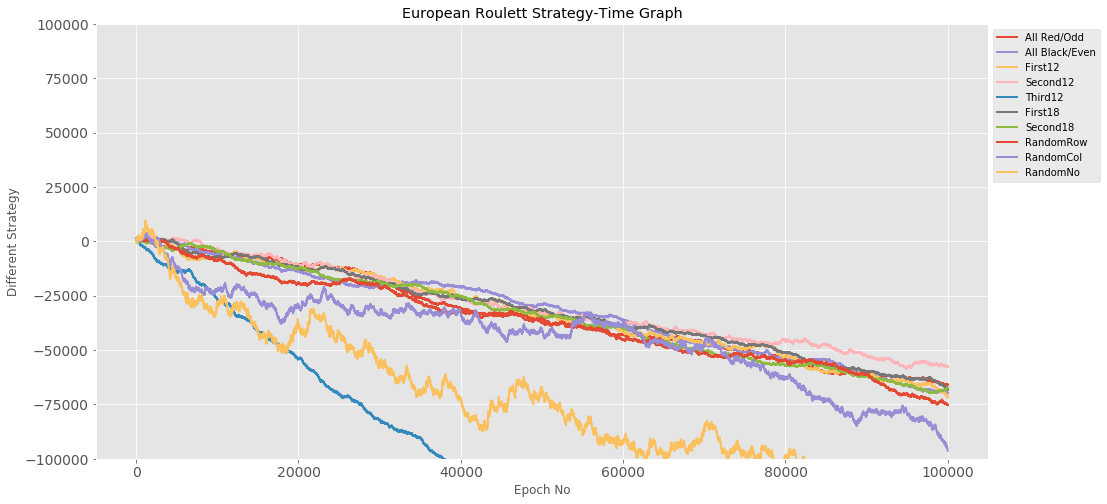

In [7]:
bettingArrayEuropean, pockets_frequency = letsPlayRoulette(EuropeanRoulette, basicStrategy, bettingScheme, EPOCH, DEFAULT_EPOCH_LOGGER, 0, 36)
showBarGraphAssetByStrategy(bettingArrayEuropean, basicStrategy, EuropeanRoulette)
showAssetsByEpochGraph(bettingArrayEuropean, EPOCH, basicStrategy, INITIAL_AMOUNT, GRAPH_LIMIT_FACTOR*2, EuropeanRoulette)